# Importation des bibliothèques nécessaires

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Ouverture et traitement des données

In [3]:
#Ouverture des données issues de ORAS5
chemin_fichier_nc = 'salinite/vosaline_control_monthly_highres_3D_201501_OPER_v0.1.nc'

ds = xr.open_dataset(chemin_fichier_nc)
salinite_era5 = ds.to_dataframe()
salinite_era5 = salinite_era5.reset_index()
salinite_era5 = salinite_era5[(salinite_era5['nav_lat'] <= -16.9)&(salinite_era5['nav_lat'] >= -17.1)&(salinite_era5['nav_lon'] == -150)]
salinite_era5 = salinite_era5[(salinite_era5['deptht'] <= 34)&(salinite_era5['deptht'] >= 30)] #la sonde est à 32m de profondeur
salinite_era5.dropna(inplace=True)
salinite_era5 = salinite_era5.rename(columns={'time_counter': 'DateTime'})
salinite_era5 = salinite_era5[['DateTime','vosaline']]
salinite_era5 = salinite_era5.reset_index().drop(columns='index')
for i in range(2015,2024):
    for j in range(1,13):
        if (i !=2015)|(j!=1) : #car déjà traité à part
            if j<10 :
                chemin_fichier_nc = 'salinite/vosaline_control_monthly_highres_3D_'+str(i)+'0'+str(j)+'_OPER_v0.1.nc'
            else : 
                chemin_fichier_nc = 'salinite/vosaline_control_monthly_highres_3D_'+str(i)+str(j)+'_OPER_v0.1.nc'
            ds = xr.open_dataset(chemin_fichier_nc)
            salinite_era5_n = ds.to_dataframe()
            salinite_era5_n = salinite_era5_n.reset_index()
            salinite_era5_n = salinite_era5_n[(salinite_era5_n['nav_lat'] <= -16.9)&(salinite_era5_n['nav_lat'] >= -17.1)&(salinite_era5_n['nav_lon'] == -150)]
            salinite_era5_n = salinite_era5_n[(salinite_era5_n['deptht'] <= 34)&(salinite_era5_n['deptht'] >= 30)]
            salinite_era5_n = salinite_era5_n.rename(columns={'time_counter': 'DateTime'})
            salinite_era5_n = salinite_era5_n[['DateTime','vosaline']]
            salinite_era5_n = salinite_era5_n.reset_index().drop(columns='index')
            salinite_era5 = pd.concat([salinite_era5,salinite_era5_n])
for i in range(1990,2015):
    for j in range(1,13):
        if (i !=2015)|(j!=1) : #car déjà traité à part
            if j<10 :
                chemin_fichier_nc = 'salinite/vosaline_control_monthly_highres_3D_'+str(i)+'0'+str(j)+'_CONS_v0.1.nc'
            else : 
                chemin_fichier_nc = 'salinite/vosaline_control_monthly_highres_3D_'+str(i)+str(j)+'_CONS_v0.1.nc'
            ds = xr.open_dataset(chemin_fichier_nc)
            salinite_era5_n = ds.to_dataframe()
            salinite_era5_n = salinite_era5_n.reset_index()
            salinite_era5_n = salinite_era5_n[(salinite_era5_n['nav_lat'] <= -16.9)&(salinite_era5_n['nav_lat'] >= -17.1)&(salinite_era5_n['nav_lon'] == -150)]
            salinite_era5_n = salinite_era5_n[(salinite_era5_n['deptht'] <= 34)&(salinite_era5_n['deptht'] >= 30)]
            salinite_era5_n = salinite_era5_n.rename(columns={'time_counter': 'DateTime'})
            salinite_era5_n = salinite_era5_n[['DateTime','vosaline']]
            salinite_era5_n = salinite_era5_n.reset_index().drop(columns='index')
            salinite_era5 = pd.concat([salinite_era5,salinite_era5_n])

salinite_era5.reset_index(inplace=True)
salinite_era5=salinite_era5.sort_values(by='DateTime')

In [4]:
salinite_era5 = salinite_era5.groupby(pd.Grouper(key='DateTime', freq='MS')).mean().reset_index()
salinite_era5.drop(columns='index',inplace=True)
salinite_era5.rename(columns={'vosaline':'salinite'},inplace=True)

# Comparaison IN SITU & ERA 5

In [5]:
salinite_criobe = pd.read_csv('Tableaux finaux variables/salinite.csv', sep = ',')
salinite_criobe['DateTime'] = salinite_criobe['DateTime'].astype('datetime64[ns]')

In [6]:
data_sali = (salinite_criobe[(salinite_criobe['DateTime'] >= pd.to_datetime('2012-01-01'))&(salinite_criobe['DateTime'] <= pd.to_datetime('2014-01-01'))]).merge(salinite_era5[(salinite_era5['DateTime'] >= pd.to_datetime('2012-01-01'))&(salinite_era5['DateTime'] <= pd.to_datetime('2014-01-01'))], on ='DateTime')
data_sali.rename(columns={'salinite_x':'salinite_criobe','salinite_y':'salinite_era5'},inplace=True)

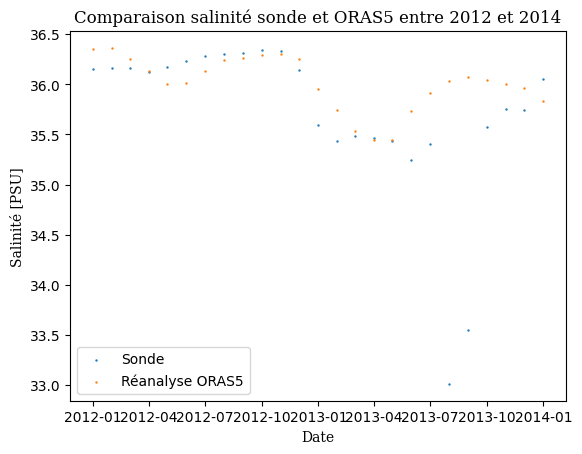

In [7]:
plt.scatter(data_sali['DateTime'], data_sali['salinite_criobe'], s = .5, label = 'Sonde')
plt.scatter(data_sali['DateTime'], data_sali['salinite_era5'], s=.5, label='Réanalyse ORAS5')
plt.title('Comparaison salinité sonde et ORAS5 entre 2012 et 2014', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Salinité [PSU]', fontfamily = 'serif')
plt.legend()

# Exporter

In [8]:
salinite_era5.to_csv('Tableaux finaux variables/fill_salinite.csv', index = False)